## Actividad 2. Proyecto de ciencia de datos utilizando R

# Detalle del Data set y referencia.
Nombre del dataset: Cardiovascular Disease Dataset
Fuente: Kaggle
URL de descarga: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
Formato: CSV
Tamaño: 70,000 registros – 13 variables

1. Elección y carga del conjunto de datos.
   
Selecciona un conjunto de datos que despierte tu interés. Pueden ser datos provenientes cualquiera área, como salud, finanzas, deportes, medio ambiente, etc. Recuerda que el conjunto de datos debe ser suficientemente grande para realizar un análisis significativo (mínimo 1000 filas y varias variables) y debe estar disponible en un formato legible por R, como csv, json, excel, etc. Puedes encontrar conjuntos de datos en plataformas como kaggle, uci machine learning repository, o google dataset search.

In [6]:
# Solución del punto 1.

# Cargar librerías
library(tidyverse)
library(readr)

# Cargar el dataset (ajusta el path según la ubicación real)
datos <- read.csv("cardio_train.csv", sep = ";")
##datos <- read_delim("cardio_train.csv", delim = ";")

# Verificar estructura inicial
glimpse(datos)
summary(datos)

Rows: 70,000
Columns: 13
$ id          <int> 0, 1, 2, 3, 4, 8, 9, 12, 13, 14, 15, 16, 18, 21, 23, 24, 2…
$ age         <int> 18393, 20228, 18857, 17623, 17474, 21914, 22113, 22584, 17…
$ gender      <int> 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2…
$ height      <int> 168, 156, 165, 169, 156, 151, 157, 178, 158, 164, 169, 173…
$ weight      <dbl> 62, 85, 64, 82, 56, 67, 93, 95, 71, 68, 80, 60, 60, 78, 95…
$ ap_hi       <int> 110, 140, 130, 150, 100, 120, 130, 130, 110, 110, 120, 120…
$ ap_lo       <int> 80, 90, 70, 100, 60, 80, 80, 90, 70, 60, 80, 80, 80, 70, 9…
$ cholesterol <int> 1, 3, 3, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ gluc        <int> 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1…
$ smoke       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1…
$ alco        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0…
$ active      <int> 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1…
$ cardio      <

       id             age            gender         height     
 Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.00   Max.   :16020.0   Max.   :11000.00   Max.   :3.000  
      gluc           smoke              alco           

2. Limpieza y transformación de los datos

In [7]:
# Aqui se Renombran las columnas a nombres más legibles para mer comprensión de las salidas del análisis.
colnames(datos) <- c("id", "edad_dias", "genero", "altura", "peso",
                     "presion_sistolica", "presion_diastolica", "colesterol",
                     "glucosa", "fuma", "alcohol", "actividad_fisica", "cardio")

# Se convierte la edad a años
datos <- datos %>% mutate(edad = floor(edad_dias / 365.25))

# Se hace limpieza de columnas no necesarias eliminandolas
datos <- datos %>% select(-id, -edad_dias)

# Verificar valores extremos en presión
datos %>% filter(presion_sistolica < 80 | presion_diastolica < 60)

# Corregir valores fuera de rango (ejemplo: intercambiar si sistólica < diastólica)
datos <- datos %>% 
  mutate(
    presion_sistolica = ifelse(presion_sistolica < presion_diastolica, 
                                presion_diastolica, presion_sistolica),
    presion_diastolica = ifelse(presion_diastolica > presion_sistolica,
                                presion_sistolica, presion_diastolica)
  )

# Verificar NA
colSums(is.na(datos))

genero,altura,peso,presion_sistolica,presion_diastolica,colesterol,glucosa,fuma,alcohol,actividad_fisica,cardio,edad
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,147,41,80,50,1,1,0,0,1,0,53
1,157,72,150,30,1,1,0,0,1,1,45
1,158,86,160,50,2,3,0,0,1,1,53
1,165,64,140,40,1,1,0,0,1,1,46
1,168,78,14,90,2,1,0,0,1,1,58
2,169,68,70,110,1,1,0,0,1,0,56
2,175,70,14,90,3,1,0,0,1,1,59
1,172,65,11,80,1,3,0,0,1,0,49
1,165,66,12,80,1,1,0,0,1,0,52


genero             altura               peso  presion_sistolica 
                 0                  0                  0                  0 
presion_diastolica         colesterol            glucosa               fuma 
                 0                  0                  0                  0 
           alcohol   actividad_fisica             cardio               edad 
                 0                  0                  0                  0

 3. Análisis exploratorio de datos (EDA)

In [9]:
# Estadísticas descriptivas

# Proporción de clases (cardio = enfermedad)
table(datos$cardio)
prop.table(table(datos$cardio))

# Correlación entre variables numéricas
numeric_vars <- datos %>% select_if(is.numeric)
cor_matrix <- cor(numeric_vars)
round(cor_matrix, 2)


    0     1 
35021 34979 


     0      1 
0.5003 0.4997 

,genero,altura,peso,presion_sistolica,presion_diastolica,colesterol,glucosa,fuma,alcohol,actividad_fisica,cardio,edad
genero,1.00,0.50,0.16,0.01,0.02,-0.04,-0.02,0.34,0.17,0.01,0.01,-0.02
altura,0.50,1.00,0.29,0.01,0.01,-0.05,-0.02,0.19,0.09,-0.01,-0.01,-0.08
peso,0.16,0.29,1.00,0.04,0.04,0.14,0.11,0.07,0.07,-0.02,0.18,0.05
presion_sistolica,0.01,0.01,0.04,1.00,0.77,0.03,0.01,0.00,0.01,0.00,0.07,0.02
presion_diastolica,0.02,0.01,0.04,0.77,1.00,0.02,0.01,0.01,0.01,0.00,0.07,0.02
colesterol,-0.04,-0.05,0.14,0.03,0.02,1.00,0.45,0.01,0.04,0.01,0.22,0.15
glucosa,-0.02,-0.02,0.11,0.01,0.01,0.45,1.00,0.00,0.01,-0.01,0.09,0.10
fuma,0.34,0.19,0.07,0.00,0.01,0.01,0.00,1.00,0.34,0.03,-0.02,-0.05
alcohol,0.17,0.09,0.07,0.01,0.01,0.04,0.01,0.34,1.00,0.03,-0.01,-0.03
actividad_fisica,0.01,-0.01,-0.02,0.00,0.00,0.01,-0.01,0.03,0.03,1.00,-0.04,-0.01


## 4. Visualización de resultados.
Posteriormente ejecuta la visualización de los datos para comunicar hallazgos y comprender mejor las características del conjunto de datos. 
Puedes apoyarte de un histograma, un gráfico de barras, de pastel o cualquier otro gráfico que resulte adecuado para los datos seleccionados.

corrplot 0.95 loaded



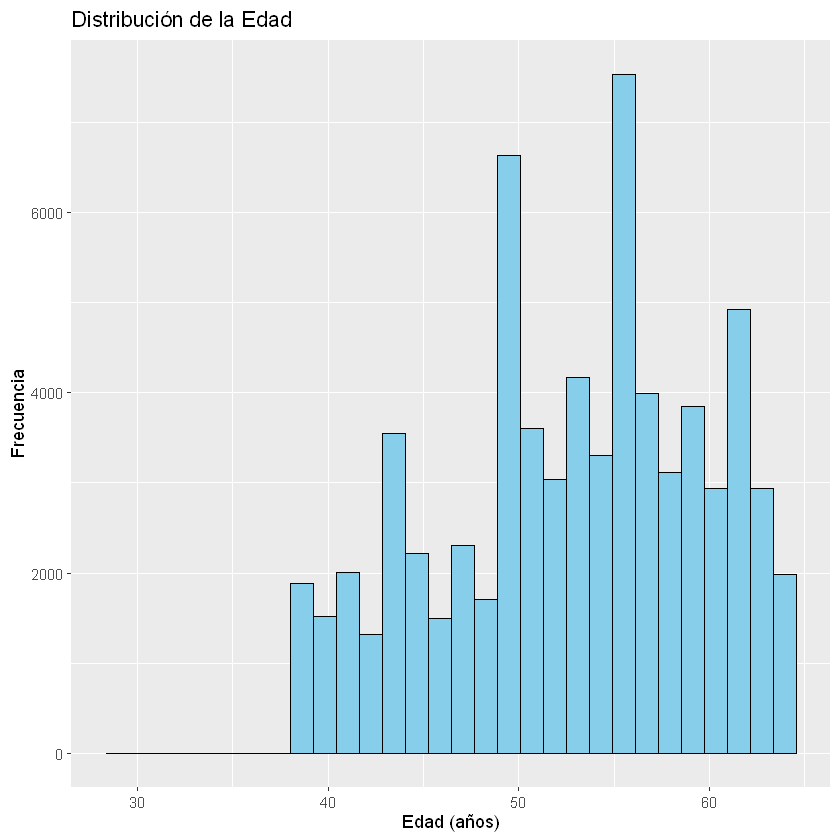

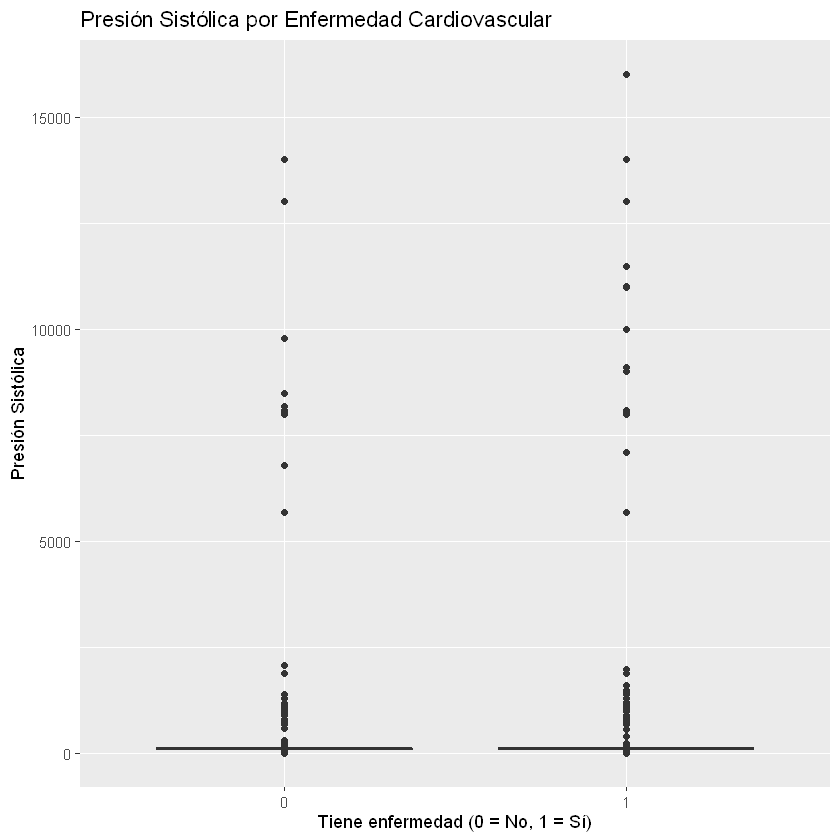

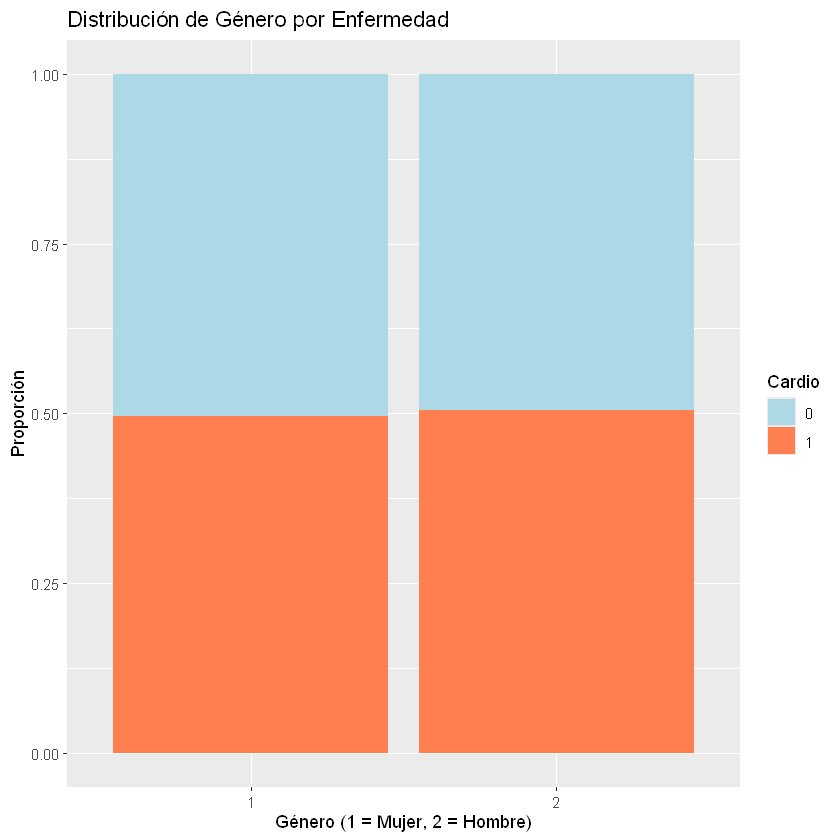

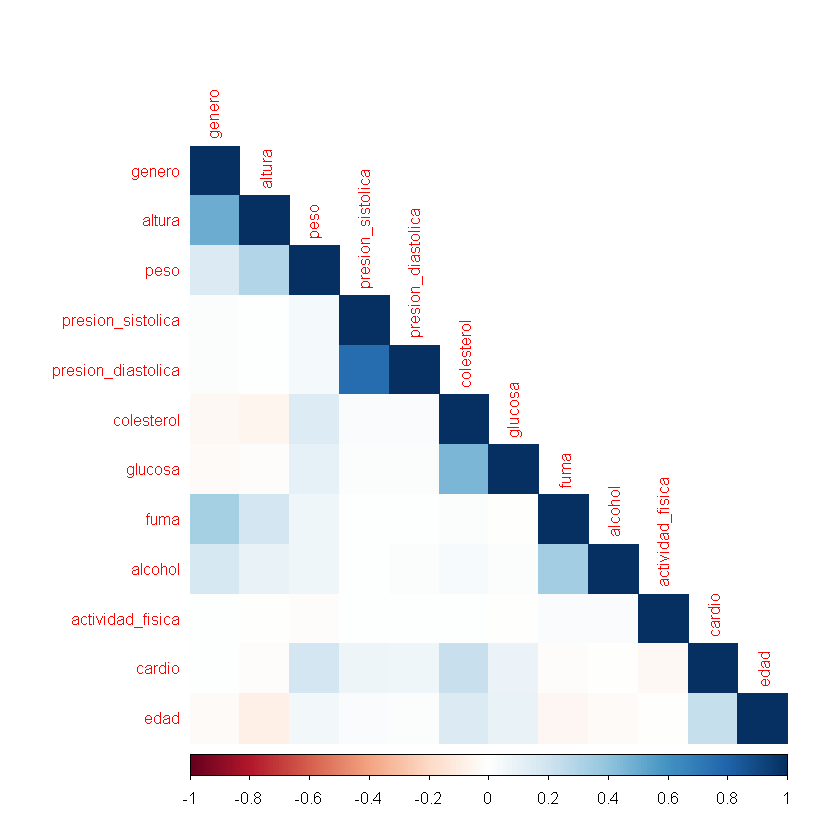

In [14]:

library(ggplot2)
library(corrplot)

# Histograma para presnetar evaluaciones de la edad
ggplot(datos, aes(x = edad)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribución de la Edad", x = "Edad (años)", y = "Frecuencia")

# Boxplot de presión arterial por clase
ggplot(datos, aes(x = factor(cardio), y = presion_sistolica)) +
  geom_boxplot(fill = c("lightgreen", "salmon")) +
  labs(title = "Presión Sistólica por Enfermedad Cardiovascular", 
       x = "Tiene enfermedad (0 = No, 1 = Sí)", y = "Presión Sistólica")

# Gráfico de barras por género y enfermedad
ggplot(datos, aes(x = factor(genero), fill = factor(cardio))) +
  geom_bar(position = "fill") +
  labs(title = "Distribución de Género por Enfermedad", 
       x = "Género (1 = Mujer, 2 = Hombre)", y = "Proporción") +
  scale_fill_manual(values = c("lightblue", "coral"), name = "Cardio")

# Heatmap de correlación
corrplot(cor_matrix, method = "color", type = "lower", tl.cex = 0.8)

## Conclusiones del analisis y las graficas

## Conclusiones

- La presión arterial alta y el colesterol elevado son factores críticos
- Se observa mayor incidencia de enfermedad en edades avanzadas
- Futuro: crear un modelo predictivo con regresión logística o árbol de decisión